
#### **Hints and Code Snippets**

1. **Generating Data**:
   ```python

   ```

2. **Compute the Decision Boundary (Theoretical Approach)**:
   ```python

   ```

3. **Compute the Decision Boundary (GaussianNB)**:
   ```python

   ```

4. **Visualize the Results**:
   ```python
   # Plot the original data

   ```

---


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.naive_bayes import GaussianNB

# Parameters
mu1 = np.array([2, 3])
mu2 = np.array([6, 5])
Sigma = np.array([[2, 1], [1, 2]])

# Generate data
np.random.seed(0)
X1 = np.random.multivariate_normal(mu1, Sigma, 200)
X2 = np.random.multivariate_normal(mu2, Sigma, 200)
y1 = np.zeros(200)  # Class 1
y2 = np.ones(200)   # Class 2

# Combine data
X = np.vstack((X1, X2))
y = np.hstack((y1, y2))

In [3]:
# # Create a grid of test points
# x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
# y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
# grid_points = np.c_[xx.ravel(), yy.ravel()]

# # Compute the decision boundary
# Sigma_inv = np.linalg.inv(Sigma)
# w = Sigma_inv @ (mu1 - mu2)
# b = 0.5 * (mu1 @ Sigma_inv @ mu1 - mu2 @ Sigma_inv @ mu2)
# decision_values = grid_points @ w - b

In [4]:
# Create a grid of test points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Compute the decision boundary using Equation (54)
Sigma_inv = np.linalg.inv(Sigma)
w = Sigma_inv @ (mu1 - mu2)  # w = Σ^(-1) (μ1 - μ2)
x0 = 0.5 * (mu1 + mu2)       # x0 = midpoint between μ1 and μ2
decision_values = (grid_points - x0) @ w  # w^T (x - x0) = 0

In [5]:
# Fit GaussianNB
model = GaussianNB()
model.fit(X, y)

# Predict labels for test points
y_pred = model.predict(grid_points)

C:\Users\mamin\AppData\Local\Temp\ipykernel_17196\3944971026.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, decision_values.reshape(xx.shape), levels=[0], colors='black', linewidths=2, label='Theoretical Boundary')
C:\Users\mamin\AppData\Local\Temp\ipykernel_17196\3944971026.py:14: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, perpendicular_line.reshape(xx.shape), levels=[0], colors='green', linewidths=2, linestyles='dotted', label='Perpendicular bisector')
C:\Users\mamin\AppData\Local\Temp\ipykernel_17196\3944971026.py:25: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, y_pred.reshape(xx.shape), levels=[0.5], colors='black', linewidths=2, label='GaussianNB Boundary')
C:\Users\mamin\AppData\Local\Temp\ipykernel_17196\3944971026.py:27: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, perpendicular_line.reshape(xx.

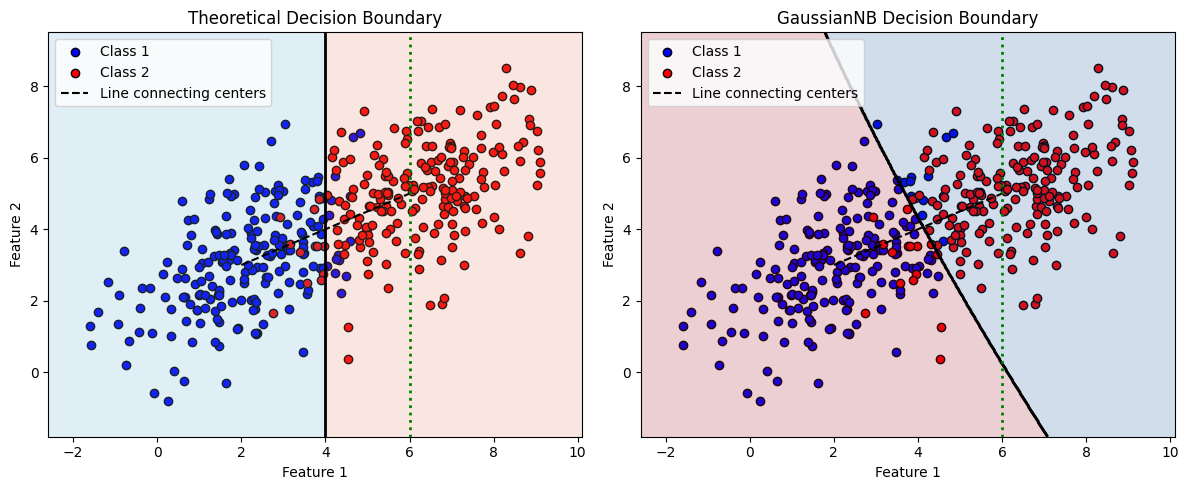

In [7]:
# Plot the original data
plt.figure(figsize=(12, 5))

# Plot 1: Theoretical Decision Boundary
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c='blue', label='Class 1', edgecolor='k')
plt.scatter(X2[:, 0], X2[:, 1], c='red', label='Class 2', edgecolor='k')
plt.contourf(xx, yy, (decision_values > 0).reshape(xx.shape), alpha=0.2, cmap='RdBu')
plt.contour(xx, yy, decision_values.reshape(xx.shape), levels=[0], colors='black', linewidths=2, label='Theoretical Boundary')
plt.plot([mu1[0], mu2[0]], [mu1[1], mu2[1]], 'k--', label='Line connecting centers')
midpoint = (mu1 + mu2) / 2
slope = -(mu2[0] - mu1[0]) / (mu2[1] - mu1[1])
perpendicular_line = slope * (xx - midpoint[0]) + midpoint[1]
plt.contour(xx, yy, perpendicular_line.reshape(xx.shape), levels=[0], colors='green', linewidths=2, linestyles='dotted', label='Perpendicular bisector')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Theoretical Decision Boundary')

# Plot 2: GaussianNB Decision Boundary
plt.subplot(1, 2, 2)
plt.scatter(X1[:, 0], X1[:, 1], c='blue', label='Class 1', edgecolor='k')
plt.scatter(X2[:, 0], X2[:, 1], c='red', label='Class 2', edgecolor='k')
plt.contourf(xx, yy, y_pred.reshape(xx.shape), alpha=0.2, cmap='RdBu')
plt.contour(xx, yy, y_pred.reshape(xx.shape), levels=[0.5], colors='black', linewidths=2, label='GaussianNB Boundary')
plt.plot([mu1[0], mu2[0]], [mu1[1], mu2[1]], 'k--', label='Line connecting centers')
plt.contour(xx, yy, perpendicular_line.reshape(xx.shape), levels=[0], colors='green', linewidths=2, linestyles='dotted', label='Perpendicular bisector')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('GaussianNB Decision Boundary')

plt.tight_layout()
plt.show()